In [1]:
import dill
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../')

import utils as utl
import datasets as d
import models as m

%load_ext autoreload
%autoreload 2

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\sap98\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# paths
filenames = ['gtt', 'hcp', 'htt', 'losses']
ext = '.dill'
dill_path = './dills/toy/'
folder_1 = 'n_1000_3d/'
folder_2 = 'n_10000_3d/'

In [3]:
# undill everything
dilled_1 = []
dilled_2 = []
for name in filenames:
    full_path_1 = dill_path + folder_1 + name + ext
    full_path_2 = dill_path + folder_2 + name + ext
    with open(full_path_1, "rb") as handle:
        dilled_1.append(dill.load(handle))
    with open(full_path_2, "rb") as handle:
        dilled_2.append(dill.load(handle))

# unpack into seperate variables
[GMM_1, CP_1, TT_1, losses_1] = dilled_1
[GMM_2, CP_2, TT_2, losses_2] = dilled_2

# Loss Plots

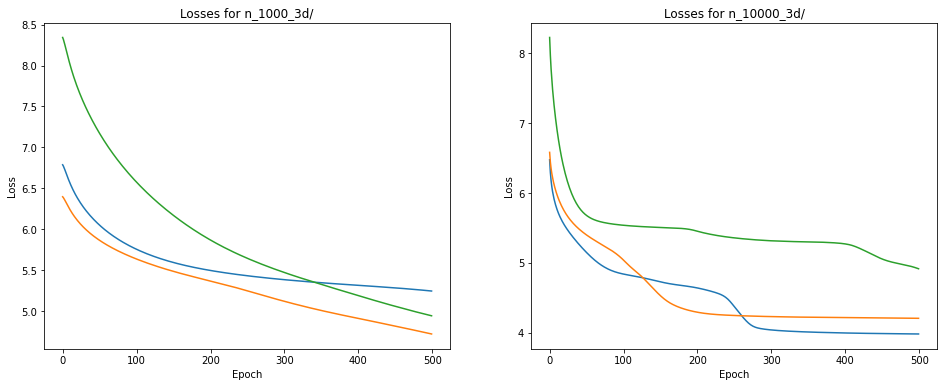

In [4]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(losses_1[:, 0, 2, :].T)
ax[0].set_title(f'Losses for {folder_1}')
ax[1].plot(losses_2[:, 0, 2, :].T)
ax[1].set_title(f'Losses for {folder_2}')

for i in range(2):
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('Loss')

plt.show()

In [ ]:
# plot over Ks
Ks = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]
Ks_CP = [2, 6, 12, 33, 84, 220, 570, 1492, 3898, 10197, 26682]
N = len(Ks_CP) - 1
idx=1

In [ ]:
f, ax = plt.subplots(1, 1)
ax.plot(Ks[1:], losses_1[0, idx, 1:, N].T, label="TT")
ax.plot(Ks[1:], losses_1[1, idx, 1:, N].T, label="CP")
ax.plot(Ks[1:], losses_1[2, idx, 1:, N].T, label="GMM")
ax.legend(loc="upper right")
ax.set_ylabel("Final Loss")
ax.set_xlabel("K")
ax.set_title("N = 1000")
plt.show()

In [ ]:
f, ax = plt.subplots(1, 1)
ax.plot(Ks[1:], losses_2[0, idx, 1:, N].T, label="TT")
ax.plot(Ks[1:], losses_2[1, idx, 1:, N].T, label="CP")
ax.plot(Ks[1:], losses_2[2, idx, 1:, N].T, label="GMM")
ax.legend(loc="upper right")
ax.set_ylabel("Final Loss")
ax.set_xlabel("K")
ax.set_title("N = 10000")
plt.show()

# Density Plots

In [5]:
utl.plot_density_3d(
    CP_1, 
    3, 
    f"Heterogeneous CP Decomposition for {folder_1}", 
    n_points=100
)

Heterogeneous CP Decomposition for n_1000_3d/


In [ ]:
utl.plot_density_3d(
    TT_1, 
    3, 
    f"Heterogeneous TT Decomposition for {folder_1}", 
    n_points=100
)

In [ ]:
utl.plot_density_3d(
    GMM_1, 
    3, 
    f"TT Gaussian Decomposition for {folder_1}", 
    n_points=100
)

In [ ]:
utl.plot_density_3d(
    CP_2, 
    3, 
    f"Heterogeneous CP Decomposition for {folder_2}", 
    n_points=100
)

In [ ]:
utl.plot_density_3d(
    TT_2, 
    3, 
    f"Heterogeneous TT Decomposition for {folder_2}", 
    n_points=100
)

In [ ]:
utl.plot_density_3d(
    GMM_2, 
    3, 
    f"TT Gaussian Decomposition for {folder_2}", 
    n_points=100
)

# Sample Plots

In [ ]:
def sample_3d(TT, CP, GMM, N_samples=1000):
    # get samples
    TT_samples = TT.sample(N_samples)
    CP_samples = CP.sample(N_samples)
    GMM_samples = GMM.sample(N_samples)

    # plot the samples
    f, ax = plt.subplots(1, 3, figsize=(12, 4))

    ax[0].plot(CP_samples[CP_samples[:, 2] == 0, 0], CP_samples[CP_samples[:, 2] == 0, 1], '.')
    ax[0].plot(CP_samples[CP_samples[:, 2] == 1, 0], CP_samples[CP_samples[:, 2] == 1, 1], '.')
    ax[0].plot(CP_samples[CP_samples[:, 2] == 2, 0], CP_samples[CP_samples[:, 2] == 2, 1], '.')
    ax[0].set_title('Sampling from CP model')

    ax[1].plot(CP_samples[CP_samples[:, 2] == 0, 0], CP_samples[CP_samples[:, 2] == 0, 1], '.')
    ax[1].plot(CP_samples[CP_samples[:, 2] == 1, 0], CP_samples[CP_samples[:, 2] == 1, 1], '.')
    ax[1].plot(CP_samples[CP_samples[:, 2] == 2, 0], CP_samples[CP_samples[:, 2] == 2, 1], '.')
    ax[1].set_title('Sampling from TT model')

    ax[2].plot(GMM_samples[np.round(GMM_samples[:, 2]) == 0, 0], GMM_samples[np.round(GMM_samples[:, 2]) == 0, 1], '.')
    ax[2].plot(GMM_samples[np.round(GMM_samples[:, 2]) == 1, 0], GMM_samples[np.round(GMM_samples[:, 2]) == 1, 1], '.')
    ax[2].plot(GMM_samples[np.round(GMM_samples[:, 2]) == 2, 0], GMM_samples[np.round(GMM_samples[:, 2]) == 2, 1], '.')
    ax[2].set_title('Sampling from GMM model')

    plt.show()

In [ ]:
sample_3d(TT_1, CP_1, GMM_1)

In [ ]:
sample_3d(TT_2, CP_2, GMM_2)